In [1]:
from selenium import webdriver

path = r"C:\Program Files (x86)\Google\Chrome\Application\chromedriver.exe"
driver = webdriver.Chrome(path)
driver.get('https://www.facebook.com/luke.larue.52/friends?lst=100001552870876%3A100001552870876%3A1592411137&source_ref=pb_friends_tl')

In [2]:
def scrolltobottom(driver, rest = 0.5):
    '''
    Scroll to the bottom of a page that only loads a few elements at a time
    '''
    while True:
        height = driver.execute_script("return document.documentElement.scrollHeight")
        driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
        #wait for new friends to load
        time.sleep(0.5)
        newHeight = driver.execute_script("return document.documentElement.scrollHeight")
        if newHeight == height:
            #run once more to make sure
            driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
            time.sleep(rest)
            newHeight = driver.execute_script("return document.documentElement.scrollHeight")
            if newHeight == height:
                return
            else:
                continue
        else:
            continue
            

In [4]:
#sign in them run this to get to friends page
driver.get('https://www.facebook.com/luke.larue.52/friends?lst=100001552870876%3A100001552870876%3A1592411137&source_ref=pb_friends_tl')

In [5]:
#scroll to bottom to load every element then scrape friends data
import time
scrolltobottom(driver)
friends = driver.find_elements_by_class_name('_39g5')

In [6]:
#Remove all friends who do not show their total friends but only mutual friends
#Also remove weird stuff that are not friend counts. I had 4 of these weird things in my friendlist, 2 said 
#"The University of Texas at Austin", 1 said "University of Texas', 1 said "Teaching Assistant (TA)"
odd = {}
for i in range(len(friends)):
    if 'friend' not in friends[i].text or 'mutual' in friends[i].text:
        odd[i] = friends[i].text
        
unwanted = list(odd.keys())
for ele in sorted(unwanted, reverse = True):
    del(friends[ele])
    

In [7]:
#convert to numpy array of ints
import numpy as np
data = np.empty(len(friends))
for idx, friend in enumerate(friends):
    decomma = friend.text.replace(',', '')
    data[idx] = [int(s) for s in decomma.split() if s.isdigit()][0]
    
    

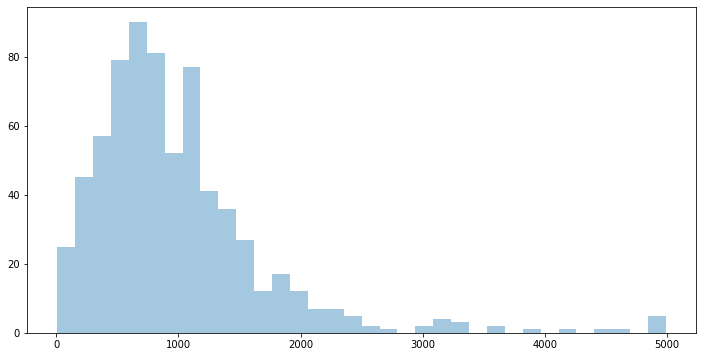

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(data, ax=ax, kde = False);